In [1]:
import numpy as np
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Дисперсия долей

In [2]:
variances = []
p1s = []
for _ in tqdm(range(1000000)):
    n_players = np.random.randint(2, 5)
    p1 = np.random.uniform(0, 1)
    if n_players == 2:
        p = [p1, 1 - p1]
    elif n_players == 3:
        p2 = np.random.uniform(0, 1 - p1)
        p = [p1, p2, 1 - p1 - p2]
    else:
        p2 = np.random.uniform(0, 1 - p1)
        p3 = np.random.uniform(0, 1 - p1 - p2)
        p = [p1, p2, p3, 1 - p1 - p2 - p3]
    p1s.append(max(p))
    variances.append(np.var(p))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [3]:
variances = np.array(variances)
p1s = np.array(p1s)

variances = variances[np.argsort(p1s)]
p1s = np.sort(p1s)

In [4]:
max(variances), min(variances)

(0.24999823237560903, 2.8334693653195128e-11)

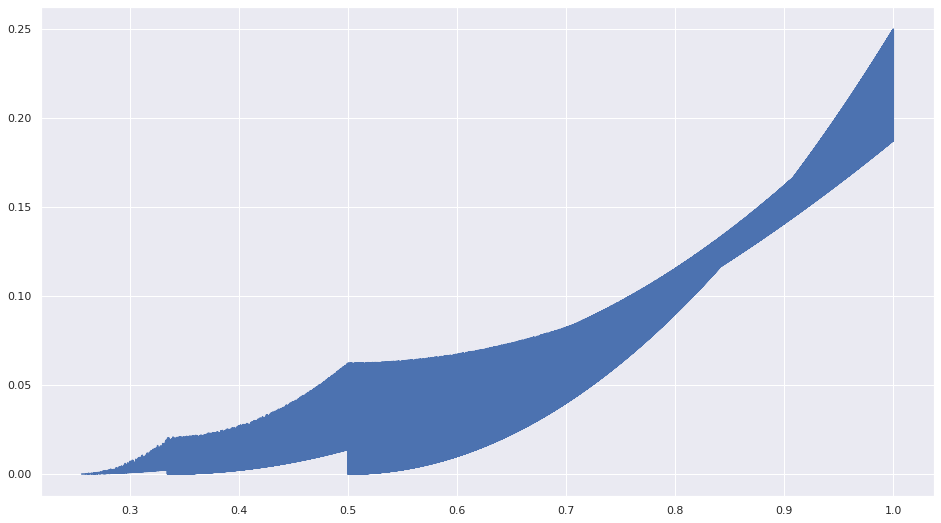

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(p1s, variances)
plt.show()

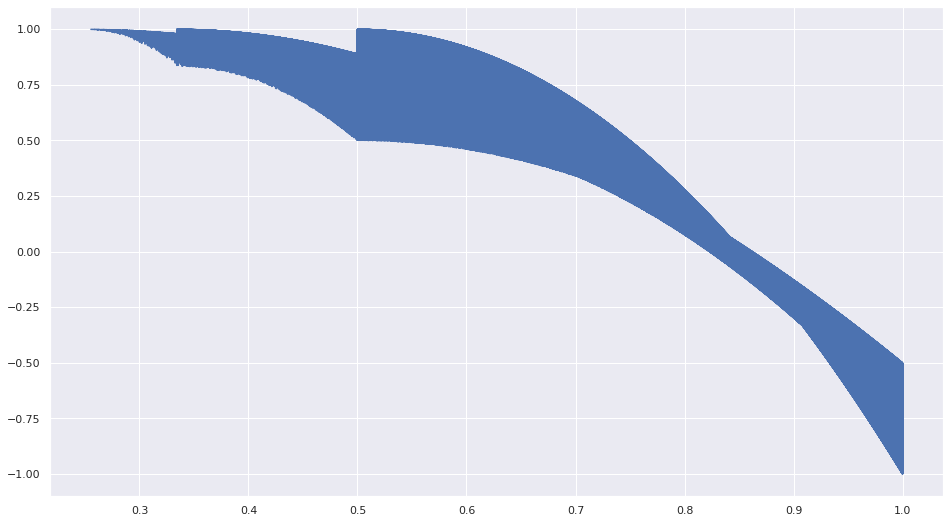

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(p1s, 1 - 8 * variances)
plt.show()

# Невязка долей

In [2]:
discrepances = {
    2: [],
    3: [],
    4: [],
}
p_maxes = {
    2: [],
    3: [],
    4: [],
}
for _ in tqdm(range(1000000)):
    n_players = np.random.randint(2, 5)
    p1 = np.random.uniform(0, 1)
    if n_players == 2:
        p = np.array([p1, 1 - p1])
    elif n_players == 3:
        p2 = np.random.uniform(0, 1 - p1)
        p = np.array([p1, p2, 1 - p1 - p2])
    else:
        p2 = np.random.uniform(0, 1 - p1)
        p3 = np.random.uniform(0, 1 - p1 - p2)
        p = np.array([p1, p2, p3, 1 - p1 - p2 - p3])
    discrepances[n_players].append(np.abs((p - p.mean())).mean())
    p_maxes[n_players].append(p.max())

  0%|          | 0/1000000 [00:00<?, ?it/s]

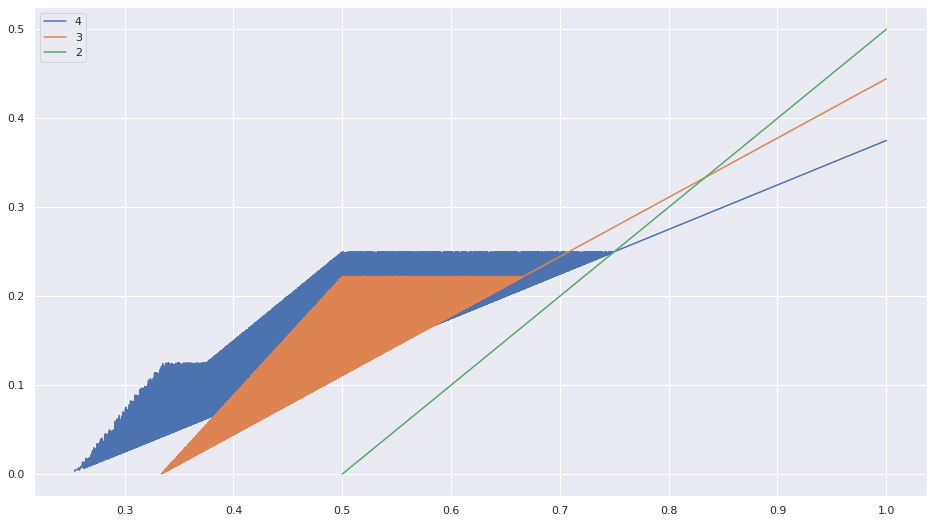

In [3]:
fig, ax = plt.subplots(figsize=(16, 9))
for n_players in reversed(discrepances.keys()):
    discrep = np.array(discrepances[n_players])
    p_max = np.array(p_maxes[n_players])

    discrep = discrep[np.argsort(p_max)]
    p_max = np.sort(p_max)
    ax.plot(p_max, discrep, label=n_players)
ax.legend()
plt.show()

In [4]:
for n_players in discrepances.keys():
    print(f'players: {n_players} => min = {min(discrepances[n_players])}, max = {max(discrepances[n_players])}')

players: 2 => min = 3.9063084680268645e-06, max = 0.4999993257546511
players: 3 => min = 0.0002640864518363058, max = 0.44444107348254996
players: 4 => min = 0.0031383731953641275, max = 0.3749990936545994


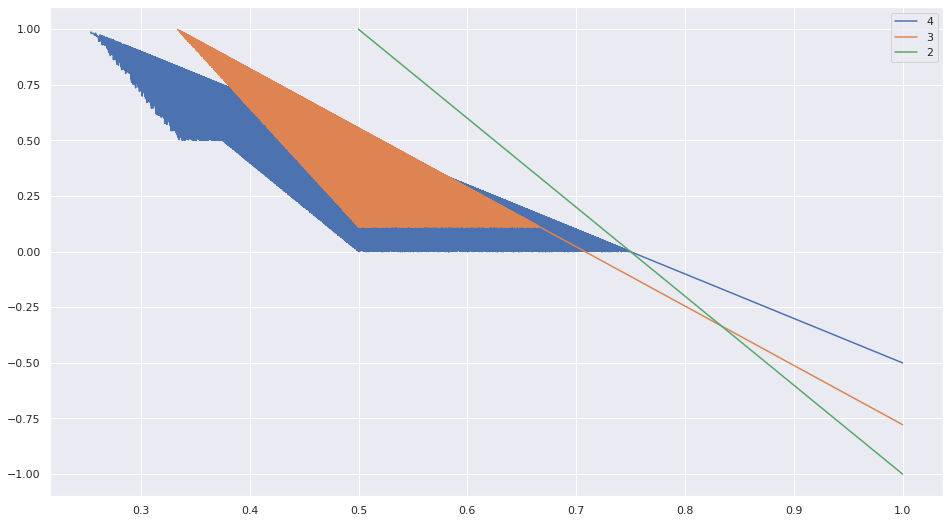

In [5]:
fig, ax = plt.subplots(figsize=(16, 9))
for n_players in reversed(discrepances.keys()):
    discrep = np.array(discrepances[n_players])
    p_max = np.array(p_maxes[n_players])

    discrep = discrep[np.argsort(p_max)]
    p_max = np.sort(p_max)
    ax.plot(p_max, 1 - 4 * discrep, label=n_players)
ax.legend()
plt.show()

# Схема с розыгрышем

# 1 рынок

In [18]:
def market_investment(x, c_t, c_0, l):
    p = x / x.sum()
    y = (1 - np.square(p).sum()) / (1 - p) * x
    profits = y - x
    profits_cap = np.minimum(profits, c_t)
    jackpot = x.sum() / l
    c_next = c_t + jackpot - y.max()
    return profits_cap + x, c_next

### Профиль по одному игроку

In [37]:
xs = [100 * i for i in range(1, 400)]
ps = [x_i / (x_i + 3000) for x_i in xs]
ys = []
cs = []

for x_i in tqdm(xs):
    x = np.array([x_i, 1000, 1000, 1000])
    c0 = 0
    c_start = 20000
    y, c_next = market_investment(x, c_start, c_0, 2)
    ys.append(y[0] - x_i)
    cs.append(np.maximum(c_next, c0))

  0%|          | 0/399 [00:00<?, ?it/s]

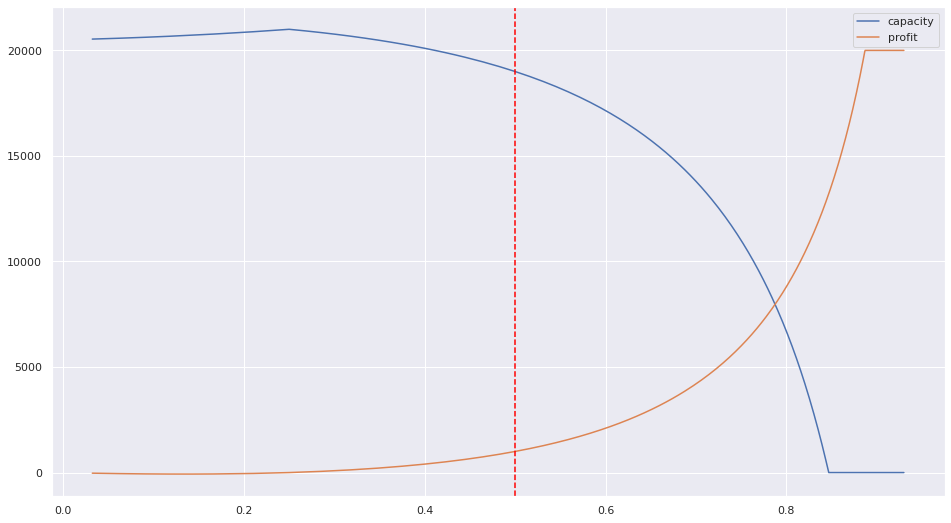

In [40]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(ps, cs, label='capacity')
ax.plot(ps, ys, label='profit')
ax.axvline(x=0.5, ls='--', color='red')
ax.legend()
plt.show()